<a href="https://colab.research.google.com/github/grisomm/eat/blob/main/eat_finger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 0. Environment setup

In [1]:
import os, shutil
dataset_name = 'water_finger_wav_500_noise_9_0.2'
#dataset_name = 'water_finger_wav_500_noise_0'
dataset_path = f'/content/drive/MyDrive/dataset/audio/{dataset_name}.tar'

%cd /content
if os.path.exists('eat'):
  shutil.rmtree('eat')
!git clone https://github.com/grisomm/eat.git

# prepare dataset
untar_path = f'/content/data/finger'
if os.path.exists(untar_path):
  shutil.rmtree(untar_path)
untar_path = f'{untar_path}/{dataset_name}'
os.makedirs(untar_path)
tar_cmd = f'tar -xvf {dataset_path} -C {untar_path}'
print(tar_cmd)
os.system(tar_cmd) 


/content
Cloning into 'eat'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 64 (delta 30), reused 49 (delta 15), pack-reused 0
Unpacking objects: 100% (64/64), done.
tar -xvf /content/drive/MyDrive/dataset/audio/water_finger_wav_500_noise_9_0.2.tar -C /content/data/finger/water_finger_wav_500_noise_9_0.2


0

#### 1-4. Train - 500_9_0.2 
- noise_ratio: 0.2
- acc: 0.9 

In [2]:
%cd /content/eat
!git pull
!python3 trainer.py --max_lr 3e-4 --emb_dim 128 --dataset finger \
  --seq_len 16384 --mix_ratio 1 --epoch_mix 12 --mix_loss bce --batch_size 128 \
  --save_path /content/drive/MyDrive/model/finger --run_name 500_9_0.2_r1 \
  --n_epochs 350 --ds_factors 4 4 4 --amp 

/content/eat
Already up to date.
Namespace(amp=True, augs_mix=['mixup', 'timemix', 'freqmix', 'phmix'], augs_noise=['awgn', 'abgn', 'apgn', 'argn', 'avgn', 'aun', 'phn', 'sine'], augs_signal=['amp', 'neg', 'tshift', 'tmask', 'ampsegment', 'cycshift'], batch_size=128, data_path='../data/finger', data_subtype='balanced', dataset='finger', dim_feedforward=512, ds_factors=[4, 4, 4], ema=0.995, emb_dim=128, epoch_mix=12, ext_pretrained=None, filter_bias_and_bn=True, fold_id=None, gpu_ids=[0], kd_model=None, load_path=None, local_rank=0, log_interval=100, loss_type='label_smooth', max_lr=0.0003, mix_loss='bce', mix_ratio=1.0, model_type='SoundNetRaw', multilabel=False, n_classes=10, n_epochs=350, n_head=8, n_layers=4, nf=16, num_workers=2, resume_training=False, run_name=PosixPath('500_9_0.2_r1'), sampling_rate=22050, save_interval=100, save_path=PosixPath('/content/drive/MyDrive/model/finger'), scheduler=None, seq_len=16384, use_balanced_sampler=False, use_bg=False, use_ddp=False, use_dp=Fa

#### 1-3. Train - 500_9 (resume)

In [ ]:
%cd /content/eat
#!git pull
!python3 trainer.py --max_lr 3e-4 --emb_dim 128 --dataset finger \
  --seq_len 16384 --mix_ratio 1 --epoch_mix 12 --mix_loss bce --batch_size 128 \
  --load_path /content/drive/MyDrive/model/finger/r1 \
  --save_path /content/drive/MyDrive/model/finger --run_name r2 \
  --n_epochs 350 --ds_factors 4 4 4 --amp 

#### 1-2. Train - 500_9 
- noise_ratio: 0.3
- acc: 0.856

In [5]:
%cd /content/eat
!git pull
!python3 trainer.py --max_lr 3e-4 --run_name r1 --emb_dim 128 --dataset finger \
  --seq_len 16384 --mix_ratio 1 --epoch_mix 12 --mix_loss bce --batch_size 128 \
  --n_epochs 350 --ds_factors 4 4 4 --amp --save_path /content/drive/MyDrive/model/finger 

/content/eat
Already up to date.
train 7000
test 3000
<datasets.finger_dataset.FingerDataset object at 0x7fc29880bf10> 128
Namespace(amp=True, augs_mix=['mixup', 'timemix', 'freqmix', 'phmix'], augs_noise=['awgn', 'abgn', 'apgn', 'argn', 'avgn', 'aun', 'phn', 'sine'], augs_signal=['amp', 'neg', 'tshift', 'tmask', 'ampsegment', 'cycshift'], batch_size=128, data_path='../data/water_finger_wav_500_noise_9', data_subtype='balanced', dataset='finger', dim_feedforward=512, ds_factors=[4, 4, 4], ema=0.995, emb_dim=128, epoch_mix=12, ext_pretrained=None, filter_bias_and_bn=True, fold_id=None, gpu_ids=[0], kd_model=None, load_path=None, local_rank=0, log_interval=100, loss_type='label_smooth', max_lr=0.0003, mix_loss='bce', mix_ratio=1.0, model_type='SoundNetRaw', multilabel=False, n_classes=10, n_epochs=350, n_head=8, n_layers=4, nf=16, num_workers=2, resume_training=False, run_name=PosixPath('r1'), sampling_rate=22050, save_interval=100, save_path=PosixPath('outputs'), scheduler=None, seq_len

#### 1-1. Train - 500_0 
- w/o noise
- acc: 0.99

In [7]:
%cd /content/eat
!git pull
!python3 trainer.py --max_lr 3e-4 --run_name r1 --emb_dim 128 --dataset finger \
  --seq_len 16384 --mix_ratio 1 --epoch_mix 12 --mix_loss bce --batch_size 128 \
  --n_epochs 350 --ds_factors 4 4 4 --amp --save_path outputs

/content/eat
Already up to date.
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Namespace(amp=True, augs_mix=['mixup', 'timemix', 'freqmix', 'phmix'], augs_noise=['awgn', 'abgn', 'apgn', 'argn', 'avgn', 'aun', 'phn', 'sine'], augs_signal=['amp', 'neg', 'tshift', 'tmask', 'ampsegment', 'cycshift'], batch_size=128, data_path='../data/water_finger_wav_500_noise_0', data_subtype='balanced', dataset='finger', dim_feedforward=512, ds_factors=[4, 4, 4], ema=0.995, emb_dim=128, epoch_mix=12, ext_pretrained=None, filter_bias_and_bn=True, fold_id=None, gpu_ids=[0], kd_model=No

#### 2. Training history - inceptionNet 

##### 4.9 two finger - 500_9 
- 두손가락 구분, w/ noise
- result
  - accuracy: 0.82
  - model: /content/drive/MyDrive/model/

[iteration #1]
Epoch 1/100
----------
train_loss: 0.9697 train_accuracy: 0.5830
val_loss: 0.6250 val_accuracy: 0.6843
Best accuracy is updated
Elapsed time: 123s

Epoch 2/100
----------
train_loss: 0.7722 train_accuracy: 0.7154
val_loss: 0.4877 val_accuracy: 0.7347
Best accuracy is updated
Elapsed time: 119s

Epoch 3/100
----------
train_loss: 0.6766 train_accuracy: 0.7650
val_loss: 0.4341 val_accuracy: 0.7807
Best accuracy is updated
Elapsed time: 120s

Epoch 4/100
----------
train_loss: 0.6438 train_accuracy: 0.7680
val_loss: 0.4083 val_accuracy: 0.7923
Best accuracy is updated
Elapsed time: 120s

Epoch 5/100
----------
train_loss: 0.6173 train_accuracy: 0.7864
val_loss: 0.4054 val_accuracy: 0.7993
Best accuracy is updated
Elapsed time: 119s

Epoch 6/100
----------
train_loss: 0.5832 train_accuracy: 0.7926
val_loss: 0.4625 val_accuracy: 0.7720
Elapsed time: 120s

Epoch 7/100
----------
train_loss: 0.5718 train_accuracy: 0.7916
val_loss: 0.4408 val_accuracy: 0.7713
Elapsed time: 120s


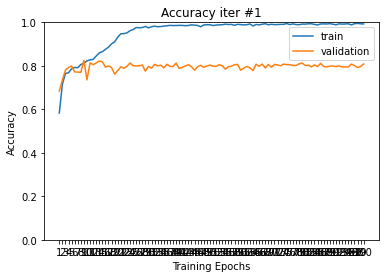

[iteration #2]
Epoch 1/100
----------
train_loss: 0.0043 train_accuracy: 0.9956
val_loss: 1.5280 val_accuracy: 0.7957
Best accuracy is updated
Elapsed time: 120s

Epoch 2/100
----------
train_loss: 0.0285 train_accuracy: 0.9896
val_loss: 1.1633 val_accuracy: 0.7860
Elapsed time: 119s

Epoch 3/100
----------
train_loss: 0.0216 train_accuracy: 0.9913
val_loss: 1.4402 val_accuracy: 0.7933
Elapsed time: 120s

Epoch 4/100
----------
train_loss: 0.0257 train_accuracy: 0.9911
val_loss: 1.1078 val_accuracy: 0.7930
Elapsed time: 120s

Epoch 5/100
----------
train_loss: 0.0053 train_accuracy: 0.9956
val_loss: 1.4690 val_accuracy: 0.7940
Elapsed time: 120s

Epoch 6/100
----------
train_loss: 0.0007 train_accuracy: 0.9966
val_loss: 1.5500 val_accuracy: 0.7983
Best accuracy is updated
Elapsed time: 119s

Epoch 7/100
----------
train_loss: 0.0109 train_accuracy: 0.9949
val_loss: 1.4949 val_accuracy: 0.7867
Elapsed time: 119s

Epoch 8/100
----------
train_loss: 0.0383 train_accuracy: 0.9881
val_loss:

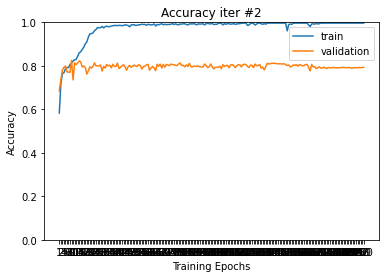

[iteration #3]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.3138 val_accuracy: 0.7943
Best accuracy is updated
Elapsed time: 119s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.3539 val_accuracy: 0.7917
Elapsed time: 119s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.3551 val_accuracy: 0.7897
Elapsed time: 119s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.3878 val_accuracy: 0.7930
Elapsed time: 119s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.4063 val_accuracy: 0.7947
Best accuracy is updated
Elapsed time: 119s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.4362 val_accuracy: 0.7927
Elapsed time: 119s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 2.4106 val_accuracy: 0.7923
Elapsed time: 119s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss:

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


##### 4.8 two finger - 500_0 
- 두손가락 구분, w/o noise
- result
  - accuracy: 0.
  - model: /content/drive/MyDrive/model/

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


[iteration #1]
Epoch 1/100
----------
train_loss: 0.4505 train_accuracy: 0.8086
val_loss: 7.1294 val_accuracy: 0.4833
Best accuracy is updated
Elapsed time: 18s

Epoch 2/100
----------
train_loss: 0.2420 train_accuracy: 0.9086
val_loss: 0.4907 val_accuracy: 0.6467
Best accuracy is updated
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0738 train_accuracy: 0.9386
val_loss: 0.1019 val_accuracy: 0.9267
Best accuracy is updated
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0278 train_accuracy: 0.9529
val_loss: 0.3109 val_accuracy: 0.8700
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.1071 train_accuracy: 0.9386
val_loss: 0.0345 val_accuracy: 0.9533
Best accuracy is updated
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0565 train_accuracy: 0.9429
val_loss: 0.2177 val_accuracy: 0.8967
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0302 train_accuracy: 0.9543
val_loss: 0.0621 val_accuracy: 0.9300
Elapsed time: 11s

Epoch 8/100
----------
train_lo

KeyboardInterrupt: ignored

##### 4.7 noise 90% 5000 dataset - no shuffle, 0.3 val_ratio
- train과 val에 같은 소스 파일이 섞이지 않기 위해
- result
  - accuracy: 0.98
  - model: /content/drive/MyDrive/model/

[iteration #1]
Epoch 1/100
----------
train_loss: 0.8838 train_accuracy: 0.6253
val_loss: 0.3668 val_accuracy: 0.8297
Best accuracy is updated
Elapsed time: 124s

Epoch 2/100
----------
train_loss: 0.4394 train_accuracy: 0.8656
val_loss: 0.1946 val_accuracy: 0.9227
Best accuracy is updated
Elapsed time: 117s

Epoch 3/100
----------
train_loss: 0.3014 train_accuracy: 0.9123
val_loss: 0.1691 val_accuracy: 0.9370
Best accuracy is updated
Elapsed time: 117s

Epoch 4/100
----------
train_loss: 0.2327 train_accuracy: 0.9369
val_loss: 0.1814 val_accuracy: 0.9213
Elapsed time: 117s

Epoch 5/100
----------
train_loss: 0.2064 train_accuracy: 0.9411
val_loss: 0.1558 val_accuracy: 0.9250
Elapsed time: 117s

Epoch 6/100
----------
train_loss: 0.1684 train_accuracy: 0.9519
val_loss: 0.0905 val_accuracy: 0.9597
Best accuracy is updated
Elapsed time: 117s

Epoch 7/100
----------
train_loss: 0.1413 train_accuracy: 0.9610
val_loss: 0.0958 val_accuracy: 0.9553
Elapsed time: 117s

Epoch 8/100
----------
t

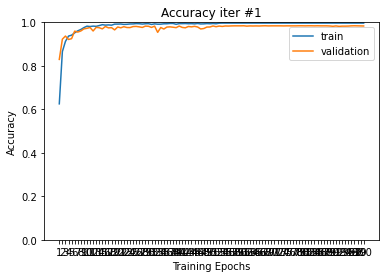

[iteration #2]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0601 val_accuracy: 0.9843
Best accuracy is updated
Elapsed time: 117s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0565 val_accuracy: 0.9850
Best accuracy is updated
Elapsed time: 117s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0607 val_accuracy: 0.9847
Elapsed time: 117s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0586 val_accuracy: 0.9847
Elapsed time: 117s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0638 val_accuracy: 0.9837
Elapsed time: 117s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0625 val_accuracy: 0.9843
Elapsed time: 117s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0637 val_accuracy: 0.9843
Elapsed time: 117s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss:

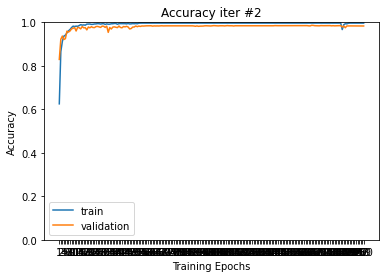

[iteration #3]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0571 val_accuracy: 0.9837
Best accuracy is updated
Elapsed time: 117s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0567 val_accuracy: 0.9837
Elapsed time: 117s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0614 val_accuracy: 0.9830
Elapsed time: 117s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0612 val_accuracy: 0.9830
Elapsed time: 117s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0638 val_accuracy: 0.9827
Elapsed time: 117s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0716 val_accuracy: 0.9827
Elapsed time: 117s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0733 val_accuracy: 0.9830
Elapsed time: 117s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0802 val_accuracy: 0.9

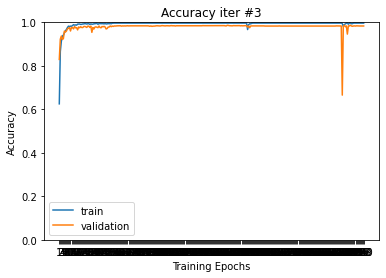

[iteration #4]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0584 val_accuracy: 0.9833
Best accuracy is updated
Elapsed time: 117s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0585 val_accuracy: 0.9837
Best accuracy is updated
Elapsed time: 117s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0606 val_accuracy: 0.9833
Elapsed time: 117s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0640 val_accuracy: 0.9830
Elapsed time: 117s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0616 val_accuracy: 0.9837
Elapsed time: 117s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0613 val_accuracy: 0.9837
Elapsed time: 117s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss: 0.0622 val_accuracy: 0.9837
Elapsed time: 116s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 0.9966
val_loss:

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


##### 4.6 noise 90% 5000 dataset - no shuffle
- train과 val에 같은 소스 파일이 섞이지 않기 위해
- result
  - accuracy: 0.98
  - model: /content/drive/MyDrive/model/

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


[iteration #1]
Epoch 1/100
----------
train_loss: 0.7758 train_accuracy: 0.6951
val_loss: 0.3535 val_accuracy: 0.8585
Best accuracy is updated
Elapsed time: 139s

Epoch 2/100
----------
train_loss: 0.3799 train_accuracy: 0.8899
val_loss: 0.1818 val_accuracy: 0.9210
Best accuracy is updated
Elapsed time: 136s

Epoch 3/100
----------
train_loss: 0.2791 train_accuracy: 0.9258
val_loss: 0.1859 val_accuracy: 0.9125
Elapsed time: 136s

Epoch 4/100
----------
train_loss: 0.2333 train_accuracy: 0.9387
val_loss: 0.1150 val_accuracy: 0.9490
Best accuracy is updated
Elapsed time: 136s

Epoch 5/100
----------
train_loss: 0.1965 train_accuracy: 0.9493
val_loss: 0.0974 val_accuracy: 0.9575
Best accuracy is updated
Elapsed time: 136s

Epoch 6/100
----------
train_loss: 0.1744 train_accuracy: 0.9561
val_loss: 0.2234 val_accuracy: 0.9115
Elapsed time: 136s

Epoch 7/100
----------
train_loss: 0.1597 train_accuracy: 0.9600
val_loss: 0.0971 val_accuracy: 0.9555
Elapsed time: 136s

Epoch 8/100
----------
t

##### 4.5 noise 95% 5000 dataset 
- result
  - accuracy: 0.90
  - model: /content/drive/MyDrive/model/

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


[iteration #1]
Epoch 1/100
----------
train_loss: 0.7819 train_accuracy: 0.7027
val_loss: 0.5840 val_accuracy: 0.7365
Best accuracy is updated
Elapsed time: 134s

Epoch 2/100
----------
train_loss: 0.4998 train_accuracy: 0.8473
val_loss: 0.2741 val_accuracy: 0.8795
Best accuracy is updated
Elapsed time: 130s

Epoch 3/100
----------
train_loss: 0.4098 train_accuracy: 0.8770
val_loss: 0.2359 val_accuracy: 0.8940
Best accuracy is updated
Elapsed time: 130s

Epoch 4/100
----------
train_loss: 0.3617 train_accuracy: 0.8949
val_loss: 0.2982 val_accuracy: 0.8740
Elapsed time: 130s

Epoch 5/100
----------
train_loss: 0.3288 train_accuracy: 0.9065
val_loss: 0.2234 val_accuracy: 0.9125
Best accuracy is updated
Elapsed time: 130s

Epoch 6/100
----------
train_loss: 0.2721 train_accuracy: 0.9218
val_loss: 0.1992 val_accuracy: 0.9085
Elapsed time: 130s

Epoch 7/100
----------
train_loss: 0.2423 train_accuracy: 0.9334
val_loss: 0.1719 val_accuracy: 0.9260
Best accuracy is updated
Elapsed time: 130s


KeyboardInterrupt: ignored

##### 4.5 noise 70% 5000 dataset 
- result
  - accuracy: 0.90
  - model: /content/drive/MyDrive/model/

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


[iteration #1]
Epoch 1/100
----------
train_loss: 0.2670 train_accuracy: 0.9141
val_loss: 0.0858 val_accuracy: 0.9605
Best accuracy is updated
Elapsed time: 131s

Epoch 2/100
----------
train_loss: 0.0498 train_accuracy: 0.9878
val_loss: 0.0137 val_accuracy: 0.9865
Best accuracy is updated
Elapsed time: 126s

Epoch 3/100
----------
train_loss: 0.0231 train_accuracy: 0.9942
val_loss: 0.0158 val_accuracy: 0.9845
Elapsed time: 126s

Epoch 4/100
----------
train_loss: 0.0111 train_accuracy: 0.9972
val_loss: 0.0161 val_accuracy: 0.9880
Best accuracy is updated
Elapsed time: 126s

Epoch 5/100
----------
train_loss: 0.0246 train_accuracy: 0.9950
val_loss: 0.0159 val_accuracy: 0.9860
Elapsed time: 126s

Epoch 6/100
----------
train_loss: 0.0125 train_accuracy: 0.9970
val_loss: 0.0037 val_accuracy: 0.9905
Best accuracy is updated
Elapsed time: 126s

Epoch 7/100
----------
train_loss: 0.0121 train_accuracy: 0.9971
val_loss: 0.0065 val_accuracy: 0.9900
Elapsed time: 126s

Epoch 8/100
----------
t

KeyboardInterrupt: ignored

##### 4.4 400 dataset 
- result
  - accuracy: 1.0 
  - model: /content/drive/MyDrive/model/

[iteration #1]
Epoch 1/100
----------
train_loss: 0.1204 train_accuracy: 0.9469
val_loss: 21.6356 val_accuracy: 0.5000
Best accuracy is updated
Elapsed time: 18s

Epoch 2/100
----------
train_loss: 0.0124 train_accuracy: 0.9953
val_loss: 0.2702 val_accuracy: 0.8813
Best accuracy is updated
Elapsed time: 10s

Epoch 3/100
----------
train_loss: 0.0190 train_accuracy: 0.9953
val_loss: 1.7174 val_accuracy: 0.5438
Elapsed time: 10s

Epoch 4/100
----------
train_loss: 0.0199 train_accuracy: 0.9953
val_loss: 0.5893 val_accuracy: 0.8000
Elapsed time: 10s

Epoch 5/100
----------
train_loss: 0.0200 train_accuracy: 0.9938
val_loss: 0.0349 val_accuracy: 0.9875
Best accuracy is updated
Elapsed time: 10s

Epoch 6/100
----------
train_loss: 0.0104 train_accuracy: 0.9969
val_loss: 0.0001 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0127 train_accuracy: 0.9969
val_loss: 0.0011 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_l

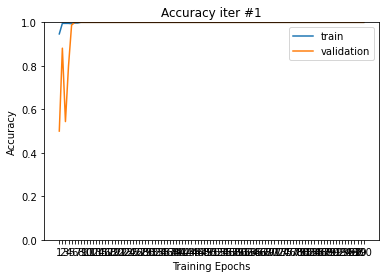

[iteration #2]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

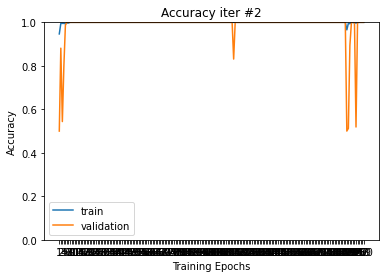

[iteration #3]
Epoch 1/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0002 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0007 train_accuracy: 1.0000
val_loss: 0.0001 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0001 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0001 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

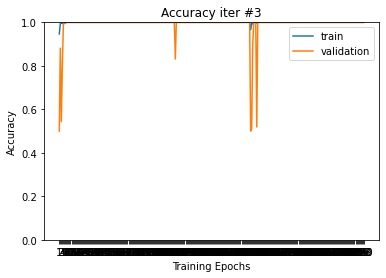

[iteration #4]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

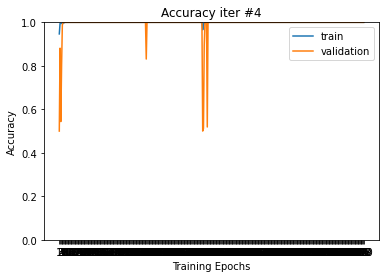

[iteration #5]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

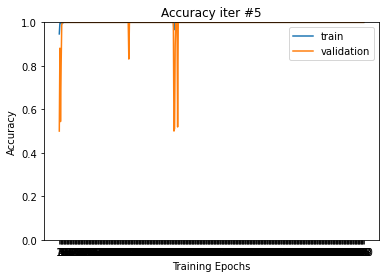

[iteration #6]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

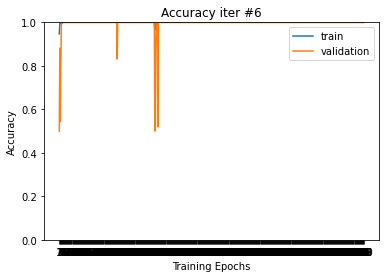

[iteration #7]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

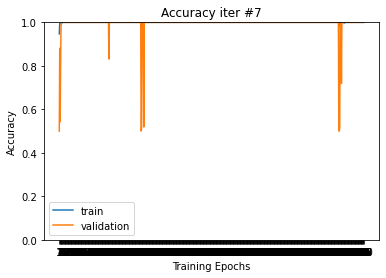

[iteration #8]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

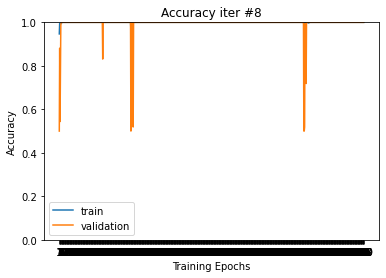

[iteration #9]
Epoch 1/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Best accuracy is updated
Elapsed time: 11s

Epoch 2/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 3/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 4/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 5/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 6/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 7/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Elapsed time: 11s

Epoch 8/100
----------
train_loss: 0.0000 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 1.0000
Ela

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


##### 4.3 300 dataset 
- result
  - accuracy: 0.80 
  - model: /content/drive/MyDrive/model/

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


[iteration #1]
Epoch 1/100
----------
train_loss: 0.0368 train_accuracy: 0.9917
val_loss: 80.6181 val_accuracy: 0.4417
Best accuracy is updated
Elapsed time: 8s

Epoch 2/100
----------
train_loss: 0.0464 train_accuracy: 0.9854
val_loss: 98.9418 val_accuracy: 0.4250
Elapsed time: 8s

Epoch 3/100
----------
train_loss: 0.0249 train_accuracy: 0.9938
val_loss: 7.0579 val_accuracy: 0.3917
Elapsed time: 8s

Epoch 4/100
----------
train_loss: 0.0111 train_accuracy: 0.9979
val_loss: 0.0048 val_accuracy: 0.8000
Best accuracy is updated
Elapsed time: 8s

Epoch 5/100
----------
train_loss: 0.0007 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 0.8000
Elapsed time: 8s

Epoch 6/100
----------
train_loss: 0.0006 train_accuracy: 1.0000
val_loss: 0.0000 val_accuracy: 0.8000
Elapsed time: 8s

Epoch 7/100
----------
train_loss: 0.0004 train_accuracy: 1.0000
val_loss: 0.0001 val_accuracy: 0.8000
Elapsed time: 8s

Epoch 8/100
----------
train_loss: 0.0001 train_accuracy: 1.0000
val_loss: 0.0000 val_

KeyboardInterrupt: ignored

##### 4.2 100 dataset 
- result
  - accuracy: 0.80 
  - model: /content/drive/MyDrive/model/

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)


[iteration #1]
Epoch 1/100
----------
train_loss: 0.3213 train_accuracy: 0.8750
val_loss: 172547.5750 val_accuracy: 0.4250
Best accuracy is updated
Elapsed time: 10s

Epoch 2/100
----------
train_loss: 0.0332 train_accuracy: 0.9938
val_loss: 981.5613 val_accuracy: 0.4000
Elapsed time: 3s

Epoch 3/100
----------
train_loss: 0.0082 train_accuracy: 1.0000
val_loss: 54.1037 val_accuracy: 0.4250
Elapsed time: 3s

Epoch 4/100
----------
train_loss: 0.0008 train_accuracy: 1.0000
val_loss: 0.1456 val_accuracy: 0.7500
Best accuracy is updated
Elapsed time: 3s

Epoch 5/100
----------
train_loss: 0.0217 train_accuracy: 0.9938
val_loss: 4.0676 val_accuracy: 0.3750
Elapsed time: 3s

Epoch 6/100
----------
train_loss: 0.0036 train_accuracy: 1.0000
val_loss: 3.7345 val_accuracy: 0.4000
Elapsed time: 3s

Epoch 7/100
----------
train_loss: 0.0009 train_accuracy: 1.0000
val_loss: 2.5859 val_accuracy: 0.4250
Elapsed time: 3s

Epoch 8/100
----------
train_loss: 0.0004 train_accuracy: 1.0000
val_loss: 1.00

KeyboardInterrupt: ignored

##### 4.1 500 dataset
- result
  - accuracy: 0.96 
  - model: /content/drive/MyDrive/model/audio_500-01-96.pt


[iteration #1]
Epoch 1/100
----------
train_loss: 0.6954 train_accuracy: 0.7700
val_loss: 3.4392 val_accuracy: 0.4550
Best accuracy is updated
Elapsed time: 13s

Epoch 2/100
----------
train_loss: 0.3777 train_accuracy: 0.8838
val_loss: 1.2499 val_accuracy: 0.5000
Best accuracy is updated
Elapsed time: 12s

Epoch 3/100
----------
train_loss: 0.3289 train_accuracy: 0.8962
val_loss: 0.3045 val_accuracy: 0.8850
Best accuracy is updated
Elapsed time: 12s

Epoch 4/100
----------
train_loss: 0.3060 train_accuracy: 0.9075
val_loss: 0.0675 val_accuracy: 0.9300
Best accuracy is updated
Elapsed time: 13s

Epoch 5/100
----------
train_loss: 0.2928 train_accuracy: 0.9163
val_loss: 0.8575 val_accuracy: 0.5450
Elapsed time: 12s

Epoch 6/100
----------
train_loss: 0.2642 train_accuracy: 0.9263
val_loss: 0.2387 val_accuracy: 0.8850
Elapsed time: 12s

Epoch 7/100
----------
train_loss: 0.1698 train_accuracy: 0.9525
val_loss: 0.0208 val_accuracy: 0.9550
Best accuracy is updated
Elapsed time: 12s

Epoch 

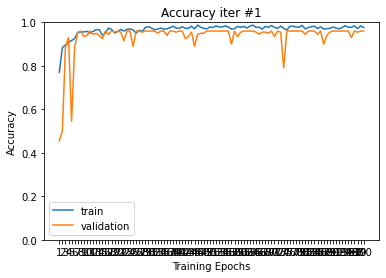

[iteration #2]
Epoch 1/100
----------
train_loss: 0.0750 train_accuracy: 0.9800
val_loss: 0.0089 val_accuracy: 0.9600
Best accuracy is updated
Elapsed time: 13s

Epoch 2/100
----------
train_loss: 0.0643 train_accuracy: 0.9788
val_loss: 0.0136 val_accuracy: 0.9550
Elapsed time: 13s

Epoch 3/100
----------
train_loss: 0.0567 train_accuracy: 0.9850
val_loss: 0.0001 val_accuracy: 0.9600
Elapsed time: 13s

Epoch 4/100
----------
train_loss: 0.0733 train_accuracy: 0.9800
val_loss: 0.0000 val_accuracy: 0.9600
Elapsed time: 13s

Epoch 5/100
----------
train_loss: 0.0520 train_accuracy: 0.9825
val_loss: 0.0001 val_accuracy: 0.9600
Elapsed time: 13s

Epoch 6/100
----------
train_loss: 0.0895 train_accuracy: 0.9713
val_loss: 0.0021 val_accuracy: 0.9600
Elapsed time: 13s

Epoch 7/100
----------
train_loss: 0.0651 train_accuracy: 0.9838
val_loss: 0.0002 val_accuracy: 0.9600
Elapsed time: 13s

Epoch 8/100
----------
train_loss: 0.0677 train_accuracy: 0.9863
val_loss: 0.0039 val_accuracy: 0.9600
Ela

In [ ]:
epochs_partial = 100 
iteration = num_epochs // epochs_partial 
history = { 'train': [], 'val': [], 'epochs': 0, 'iteration': 0}

for i in range(iteration):

  print(f'[iteration #{i+1}]')
  model, best_model_wts, best_acc = train_model(model, dataloaders, loss, optimizer, epochs_partial, history)

  # save model
  dataset_name = Path(dataset_path).stem
  best_acc = int(best_acc * 100)
  model_path = f'{model_save_path}/{dataset_name}-{i+1:02d}-{best_acc}.pt' 
  torch.save(best_model_wts, model_path)
  print(f'best model is saved to {model_path}')

  # show history
  history['epochs'] += epochs_partial 
  history['iteration'] = i + 1 
  show_history(history)
